In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir('../')


from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

import xgboost as xgb

In [2]:
train = pd.read_csv("./data/titanic/02 - preprocesada/train.csv")

In [7]:
train.shape

(891, 28)

In [3]:
X = train.drop(columns = ["Survived", "PassengerId"])
y = train.Survived
X, X_validation, y, y_validation = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
X.shape

(801, 26)

In [4]:
baseFinal = pd.DataFrame()
modelosEntrenados = []
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    aux = X_test.copy()
    aux["target"] = y_test
    learner = xgb.XGBClassifier(n_estimators = 100, booster =  'dart', max_depth = 5)
    learner.fit(X_train, y_train)
    modelosEntrenados.append(learner)
    aux["score"] = learner.predict_proba(X_test)[:,1]
    baseFinal = baseFinal.append(aux)


In [6]:
baseFinal

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,titulo_Master,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Officer,titulo_Royalty,decilesEdad_0,decilesEdad_1,decilesEdad_2,decilesEdad_3,decilesEdad_4,decilesEdad_5,decilesEdad_6,decilesEdad_7,decilesEdad_8,decilesEdad_9,labelEncoderEmbarked,target,score
165,9.0,0,2,20.5250,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1.0,0.800543
541,9.0,4,2,31.2750,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0.0,0.024657
625,61.0,0,0,32.3208,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.068940
388,25.0,0,0,7.7292,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.051286
76,25.0,0,0,7.8958,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0.0,0.010861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,21.0,0,0,7.6500,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1.0,0.234173
270,42.0,0,0,31.0000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0.0,0.932350
860,41.0,2,0,14.1083,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0.0,0.006154
435,14.0,1,2,120.0000,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1.0,0.951523


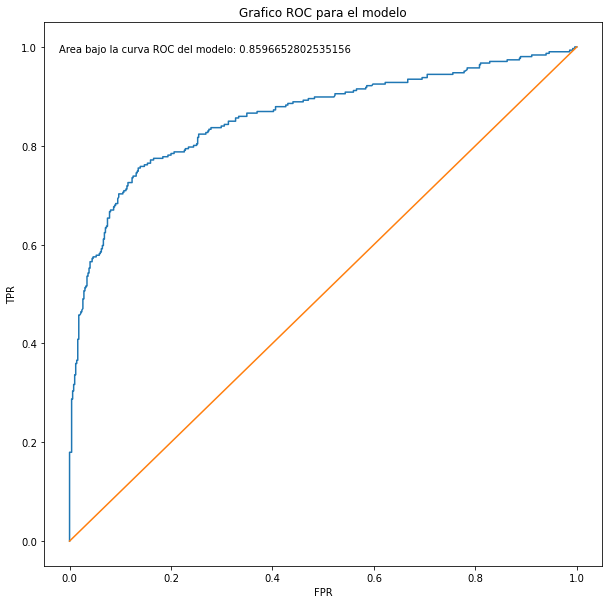

In [9]:
areaBajoCurvaRoc = roc_auc_score(baseFinal.target, baseFinal.score)
fpr, tpr, _ = roc_curve(baseFinal.target, baseFinal.score)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()